# Read me

This script reproduces Figure 6 in [1].

> [1] Rubbens, Anne, Hendrickx, Julien M., and Taylor, Adrien B. "A constructive approach to strengthen algebraic descriptions of function and operator classes."

Given $(x_1,f_1,g_1)=(0,0,0)$, $(x_2,f_2,g_2)=(2,(1+1/\alpha)^\alpha,(1+1/\alpha)^\alpha)$ $ x_3=1$, $\alpha=1/2$ and $L=1$, it plots the allowed region for $f_3$ as a function of $g_3$, according to 
  
$p_{0,L,\alpha}$, satisfied at ${(x_i,f_i,g_i),(x_j,f_j,g_j)}$ if and only if:
      
>$f_i\geq f_j+\langle g_j,x_i-x_j\rangle+\frac{\alpha}{(\alpha+1)L^{1/\alpha}} \|g_i-g_j\|^{\frac{\alpha+1}{\alpha}}$.

and to $\tilde{p}_{0,L,\alpha}$, satisfied at ${(x_i,f_i,g_i),(x_j,f_j,g_j),(x_k,f_k,g_k)}$ if and only if:
> $0\geq \underset{\lambda \in [0,1]}{\max\ }\lambda (-f_i+f_k+\langle g_k,x_i-x_k\rangle)+(1-\lambda) (-f_i+f_j+\langle g_j,x_i-x_j\rangle)+\frac{\alpha}{(\alpha+1)L^{1/\alpha}} \left((\lambda(1-\lambda)^{\frac{\alpha+1}{\alpha}}+(1-\lambda)\lambda^{\frac{\alpha+1}{\alpha}})\|g_k-g_j\|^{\frac{\alpha+1}{\alpha}}+\|g_i-\lambda g_k-(1-\lambda)g_j\|^{\frac{\alpha+1}{\alpha}}\right).$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Matplotlib is building the font cache; this may take a moment.


In [2]:
def f_min(beta,x1,g1,f1,x2,g2,f2,x3,g3,alpha,L):

#    Computation of tilde{p}_{0,L,alpha}: i=3, j=2, k=1: lower bound on f3 to be maximized

    mu=1/L
    q=1+1/alpha
    y=-(beta*(f1+g1*(x3-x1))+(1-beta)*(f2+g2*(x3-x2))+abs(g1-g2)**q*mu/q*(beta**q*(1-beta)+beta*(1-beta)**q)-mu/q*abs(g3-beta*g1-(1-beta)*g2)**q)
    return y


def f_max(beta,x1,g1,f1,x2,g2,f2,x3,g3,alpha,L):

#    Computation of tilde{p}_{0,L,alpha}: i=1, j=2, k=3: upper bound on f3 to be minimized

    mu=1/L
    q=1+1/alpha
    y=f1+g3*(x3-x1)+(1-beta)/beta*(f1-f2-g2*(x1-x2))-abs(g2-g3)**q*mu/q*(beta**(q-1)*(1-beta)+(1-beta)**q)-mu/q/beta*abs(x1-beta*x3-(1-beta)*x2)**q
    return y


Computation of the extremal value for $f_3$ such that ${(x_1, f_1, g_1),(x_2, f_2, g_2),(x_3,f_3,g_3)}$ satisfies $p_{0,L,\alpha}$ or $\tilde{p}_{0,L,\alpha}$

Arguments:

>$x_1,f_1, g_1,x_2,f_2,g_2,x_3,g_3$: values of the dataset to be consistent with $p_{0,L,\alpha}$ or $\tilde{p}_{0,L,\alpha}$

>$L_x, L_y$: parameters of $p_{0,L}$ or $\tilde{p}_{0,L}$

>objective: If objective>=0, extremal_val_holder_smooth computes the minimal value for $f_3$. Else, it computes its maximal value.
>
>constr: If constr >= 0, it ensures the set satisfies $p_{0,L,\alpha}$. Otherwise, it ensures the set satisfies $\tilde{p}_{0,L,\alpha}$.


In [3]:
# Function to compute the extremal value for f3
def extremal_val_holder_smooth(x1,g1,f1,x2,g2,f2,x3,g3,alpha,L,constr,objective):
    """
    This function computes the extremal value for f3 such that
    {(x1, f1, g1), (x2, f2, g2), (x3, f3, g3)} satisfies p_{0,L,alpha} or tilde{p}_{0,L,alpha}.
    
    Arguments:
        -x1,g1,f1,x2,g2,f2,x3,g3: Dataset values with respect to which 32 has to satisfy p_{0,L,alpha} or tilde{p}_{0,L,alpha}.
        -L,alpha: Parameters of p_{0,L,alpha} or tilde{p}_{0,L,alpha}.
        -constr: If constr >= 0, it ensures the set satisfies p_{0,L,alpha}. Otherwise, it ensures the set satisfies tilde{p}_{0,L,alpha}.
        -objective: If objective >= 0, extremal_val_holder_smooth computes the minimal value for f3. Else, it computes its maximal value.
    
    Returns:
        -f3: Extremal value for f3.
    """
    options = {'disp': False}
    
    # Computation of tilde{p}_{0,L,alpha}
    # i=1, j=2, k=3
    beta = 1
    fun = lambda beta: f_max(beta,x1,g1,f1,x2,g2,f2,x3,g3,alpha,L)
    res = minimize(fun, beta, bounds=[(0, 1)], options=options)
    fmax = res.fun

    # i=2,j=1,k=3;
    fun = lambda beta: f_max(beta,x2,g2,f2,x1,g1,f1,x3,g3,alpha,L)
    res = minimize(fun, beta, bounds=[(0, 1)], options=options)
    fmax = min(fmax,res.fun)

    # i=3,j=2,k=1
    fun = lambda beta: f_min(beta,x1,g1,f1,x2,g2,f2,x3,g3,alpha,L)
    res = minimize(fun, beta, bounds=[(0, 1)], options=options)
    fmin = -res.fun
    
    # Ensuring that {((x1, f1, g1), (x2, f2, g2),(x3,f3,g3)} satisfies p_{0,L,alpha} by bounding f3.
    mu=1/L
    q=1+1/alpha
    if constr >= 0:
        bound_min = max(f1 + g1 * (x3 - x1) + mu / q * abs(g1 - g3) ** q,
                        f2 + g2 * (x3 - x2) + mu / q * abs(g2 - g3) ** q)
        bound_max = min(f1 + g3 * (x3 - x1) - mu/ q * abs(g1 - g3) ** q,
                        f2 + g3 * (x3 - x2) -mu/ q * abs(g2 - g3) ** q)
    else:
        bound_min = max(fmin,f1 + g1 * (x3 - x1) + mu / q * abs(g1 - g3) ** q,
                        f2 + g2 * (x3 - x2) + mu / q * abs(g2 - g3) ** q)
        bound_max = min(fmax,f1 + g3 * (x3 - x1) - mu/ q * abs(g1 - g3) ** q,
                        f2 + g3 * (x3 - x2) -mu/ q * abs(g2 - g3) ** q)
    bounds=[(round(bound_min, 4),round(bound_max, 4))]
    # Initial value for f3
    f3_0 = 1
    # Minimization or maximization of f3
    def fun_obj(f3):
        return f3*objective

    res = minimize(fun_obj, f3_0, bounds=bounds, options={'disp': False})
    
    return res.x[0]   


In [4]:
# Dataset and parameters
alpha=1/2
L=1
f1=0
x1=0
g1=0
f2=(1+1/alpha)**alpha
g2=(1+1/alpha)**alpha
x2=2
x3=1


# Interval of values for h3
N = 25
G3 = np.linspace(g2-L,L,N)

# Initialize arrays for f3_min and f3_max
f3_min = np.zeros((2, N))
f3_max = np.zeros((2, N))

# Compute the extremal values for f3 as a function of g3
for i in range(N):
    f3_min[0, i] = extremal_val_holder_smooth(x1,g1,f1,x2,g2,f2,x3,G3[i],alpha,L,1,1)
    f3_max[0, i] = extremal_val_holder_smooth(x1,g1,f1,x2,g2,f2,x3,G3[i],alpha,L,1,-1)
    f3_min[1, i] = extremal_val_holder_smooth(x1,g1,f1,x2,g2,f2,x3,G3[i],alpha,L,-1,1)
    f3_max[1, i] = extremal_val_holder_smooth(x1,g1,f1,x2,g2,f2,x3,G3[i],alpha,L,-1,-1)

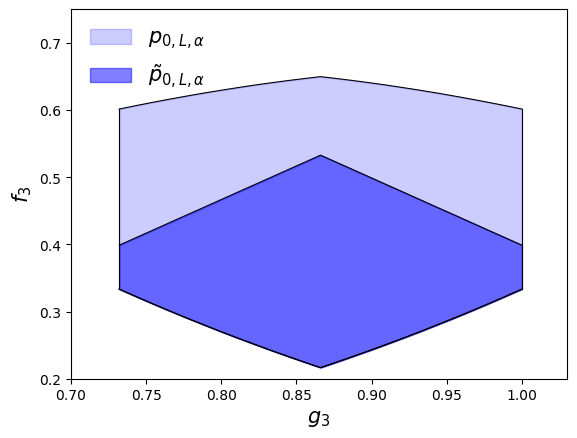

In [5]:
# Plot the result
plt.fill_between(G3, f3_min[0, :], f3_max[0, :], color='blue', alpha=0.2, label=r'$p_{0,L,\alpha}$')
plt.fill_between(G3, f3_min[1, :], f3_max[1, :], color='blue', alpha=0.5, label=r'$\tilde{p}_{0,L,\alpha}$')
plt.plot(G3, f3_min[0,:], color='black', linewidth=0.8)
plt.plot(G3, f3_max[0,:], color='black', linewidth=0.8)
plt.plot(G3, f3_min[1,:], color='black', linewidth=0.8) 
plt.plot(G3, f3_max[1,:], color='black', linewidth=0.8)
plt.plot([g2-L,g2-L],[1/3,0.6013],color='black', linewidth=0.8)
plt.plot([L,L],[1/3,0.6013],color='black', linewidth=0.8)
# Adding labels and formatting
plt.xlabel(r'$g_3$', fontsize=15)
plt.ylabel(r'$f_3$', fontsize=15)
plt.xlim([0.7,1.03])
plt.ylim([0.2,0.75])
plt.legend(fontsize=15, loc='upper left', frameon=False)
plt.show()